In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
DATA_PATH = 'data_csv'

## Описание данных

Данные содержатся в нескольких файлах .csv в папке data_csv. Наша задача - сформировать из этих файлов одну таблицу, содержащую нужную нам информацию. Содержание таблиц следующее:

**D_work**

Описание статусов относительно работы:
- ID — идентификатор социального статуса клиента относительно работы;
- COMMENT — расшифровка статуса.


**D_pens**

Описание статусов относительно пенсии:
- ID — идентификатор социального статуса;
- COMMENT — расшифровка статуса.


**D_clients**

Описание данных клиентов:
- ID — идентификатор записи;
- AGE	— возраст клиента;
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- EDUCATION — образование;
- MARITAL_STATUS — семейное положение;
- CHILD_TOTAL	— количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- SOCSTATUS_WORK_FL	— социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL	— социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- REG_ADDRESS_PROVINCE — область регистрации клиента;
- FACT_ADDRESS_PROVINCE — область фактического пребывания клиента;
- POSTAL_ADDRESS_PROVINCE — почтовый адрес области;
- FL_PRESENCE_FL — наличие в собственности квартиры (1 — есть, 0 — нет);
- OWN_AUTO — количество автомобилей в собственности.


**D_agreement**

Таблица с зафиксированными откликами клиентов на предложения банка:
- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- ID_CLIENT — идентификатор клиента;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было).
    
    
**D_job**

Описание информации о работе клиентов:
- GEN_INDUSTRY — отрасль работы клиента;
- GEN_TITLE — должность;
- JOB_DIR — направление деятельности внутри компании;
- WORK_TIME — время работы на текущем месте (в месяцах);
- ID_CLIENT — идентификатор клиента.


**D_salary**

Описание информации о заработной плате клиентов:
- ID_CLIENT — идентификатор клиента;
- FAMILY_INCOME — семейный доход (несколько категорий);
- PERSONAL_INCOME — личный доход клиента (в рублях).


**D_last_credit**

Информация о последнем займе клиента:
- ID_CLIENT — идентификатор клиента;
- CREDIT — сумма последнего кредита клиента (в рублях);
- TERM — срок кредита;
- FST_PAYMENT — первоначальный взнос (в рублях).


**D_loan**

Информация о кредитной истории клиента:
- ID_CLIENT — идентификатор клиента;
- ID_LOAN — идентификатор кредита.

**D_close_loan**

Информация о статусах кредита (ссуд):
- ID_LOAN — идентификатор кредита;
- CLOSED_FL — текущий статус кредита (1 — закрыт, 0 — не закрыт).

Ориентировочо, результирующая таблица должна содержать следующие поля:

**result_table**

- AGREEMENT_RK — уникальный идентификатор объекта в выборке;
- TARGET — целевая переменная: отклик на маркетинговую кампанию (1 — отклик был зарегистрирован, 0 — отклика не было);
- AGE — возраст клиента;
- SOCSTATUS_WORK_FL — социальный статус клиента относительно работы (1 — работает, 0 — не работает);
- SOCSTATUS_PENS_FL — социальный статус клиента относительно пенсии (1 — пенсионер, 0 — не пенсионер);
- GENDER — пол клиента (1 — мужчина, 0 — женщина);
- CHILD_TOTAL — количество детей клиента;
- DEPENDANTS — количество иждивенцев клиента;
- PERSONAL_INCOME — личный доход клиента (в рублях);
- LOAN_NUM_TOTAL — количество ссуд клиента;
- LOAN_NUM_CLOSED — количество погашенных ссуд клиента.

## Формируем данные

> Для начала создадим словарь и прочитаем в него все .csv файлы в виде датафреймов.

In [3]:
data_dict = {}

for file in os.listdir(DATA_PATH):
    # Путь до файла
    file_path = DATA_PATH + '/' + file
    # Имя файла без расширения
    file_stem = file.split('.')[0]
    data_dict[file_stem] = pd.read_csv(file_path)

print(data_dict.keys())

dict_keys(['D_job', 'D_target', 'D_work', 'D_close_loan', 'D_loan', 'D_clients', 'D_salary', 'D_last_credit', 'D_pens'])


> На данном этапе не будем проверять данные на предмет дублей, просто сджойним все в одну таблицу.

> Начнем с таблиц, содержащих информацию о целевой переменной и о клиентах: D_agreement и D_clients.

In [4]:
result_table = data_dict['D_target'].merge(data_dict['D_clients'], how='left', left_on='ID_CLIENT', right_on='ID')
result_table.head(3)

AGREEMENT_RK  ID_CLIENT  TARGET         ID  AGE  GENDER  \
0      59910150  106804370       0  106804370   49       1   
1      59910230  106804371       0  106804371   32       1   
2      59910525  106804372       0  106804372   52       1   

             EDUCATION  MARITAL_STATUS  CHILD_TOTAL  DEPENDANTS  \
0  Среднее специальное  Состою в браке            2           1   
1              Среднее  Состою в браке            3           3   
2     Неполное среднее  Состою в браке            4           0   

   SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  REG_ADDRESS_PROVINCE  \
0                  1                  0  Оренбургская область   
1                  1                  0    Кабардино-Балкария   
2                  1                  0     Иркутская область   

  FACT_ADDRESS_PROVINCE POSTAL_ADDRESS_PROVINCE  FL_PRESENCE_FL  OWN_AUTO  
0  Оренбургская область    Оренбургская область               0         0  
1    Кабардино-Балкария      Кабардино-Балкария               0         0  
2     Иркутская область       Иркутская область               0         0

> Теперь добавим к этой таблиц информацию о персональных доходах.

In [5]:
result_table = result_table.merge(data_dict['D_salary'], how='left', on='ID_CLIENT')
result_table.head(3)

AGREEMENT_RK  ID_CLIENT  TARGET         ID  AGE  GENDER  \
0      59910150  106804370       0  106804370   49       1   
1      59910150  106804370       0  106804370   49       1   
2      59910230  106804371       0  106804371   32       1   

             EDUCATION  MARITAL_STATUS  CHILD_TOTAL  DEPENDANTS  \
0  Среднее специальное  Состою в браке            2           1   
1  Среднее специальное  Состою в браке            2           1   
2              Среднее  Состою в браке            3           3   

   SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  REG_ADDRESS_PROVINCE  \
0                  1                  0  Оренбургская область   
1                  1                  0  Оренбургская область   
2                  1                  0    Кабардино-Балкария   

  FACT_ADDRESS_PROVINCE POSTAL_ADDRESS_PROVINCE  FL_PRESENCE_FL  OWN_AUTO  \
0  Оренбургская область    Оренбургская область               0         0   
1  Оренбургская область    Оренбургская область               0         0   
2    Кабардино-Балкария      Кабардино-Балкария               0         0   

            FAMILY_INCOME  PERSONAL_INCOME  
0  от 10000 до 20000 руб.           5000.0  
1  от 10000 до 20000 руб.           5000.0  
2  от 10000 до 20000 руб.          12000.0

> Добавим информацию о кредитах клиента: их суммарное количество, и текущий статус каждого (закрыт или нет)

In [6]:
loan_data = data_dict['D_loan'].merge(data_dict['D_close_loan'], how='left', on='ID_LOAN')
loan_data = pd.get_dummies(loan_data, columns=['CLOSED_FL'], dtype='int')
loan_data.head(3)

ID_LOAN  ID_CLIENT  CLOSED_FL_0  CLOSED_FL_1
0  1753790658  106804370            0            1
1  1753790659  106804371            0            1
2  1753790660  106804372            0            1

In [7]:
loan_data.duplicated(subset=['ID_LOAN', 'ID_CLIENT']).sum()

0

In [8]:
loan_data_count = loan_data.groupby('ID_CLIENT', as_index=False).agg({'ID_LOAN': 'count', 'CLOSED_FL_1': 'sum'})
loan_data_count = loan_data_count.rename({'ID_LOAN': 'LOAN_NUM_TOTAL', 'CLOSED_FL_1': 'LOAN_NUM_CLOSED'}, axis=1)
loan_data_count.head(5)

ID_CLIENT  LOAN_NUM_TOTAL  LOAN_NUM_CLOSED
0  106804370               1                1
1  106804371               1                1
2  106804372               2                1
3  106804373               1                1
4  106804374               2                1

In [9]:
result_table = result_table.merge(loan_data_count, how='left', on='ID_CLIENT')
result_table.head(3)

AGREEMENT_RK  ID_CLIENT  TARGET         ID  AGE  GENDER  \
0      59910150  106804370       0  106804370   49       1   
1      59910150  106804370       0  106804370   49       1   
2      59910230  106804371       0  106804371   32       1   

             EDUCATION  MARITAL_STATUS  CHILD_TOTAL  DEPENDANTS  ...  \
0  Среднее специальное  Состою в браке            2           1  ...   
1  Среднее специальное  Состою в браке            2           1  ...   
2              Среднее  Состою в браке            3           3  ...   

   SOCSTATUS_PENS_FL  REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE  \
0                  0  Оренбургская область  Оренбургская область   
1                  0  Оренбургская область  Оренбургская область   
2                  0    Кабардино-Балкария    Кабардино-Балкария   

  POSTAL_ADDRESS_PROVINCE FL_PRESENCE_FL  OWN_AUTO           FAMILY_INCOME  \
0    Оренбургская область              0         0  от 10000 до 20000 руб.   
1    Оренбургская область              0         0  от 10000 до 20000 руб.   
2      Кабардино-Балкария              0         0  от 10000 до 20000 руб.   

  PERSONAL_INCOME  LOAN_NUM_TOTAL  LOAN_NUM_CLOSED  
0          5000.0               1                1  
1          5000.0               1                1  
2         12000.0               1                1  

[3 rows x 21 columns]

>Теперь удалим ненужные столбцы из получившейся таблицы, и вроде бы все готово!

In [10]:
result_table.columns

Index(['AGREEMENT_RK', 'ID_CLIENT', 'TARGET', 'ID', 'AGE', 'GENDER',
       'EDUCATION', 'MARITAL_STATUS', 'CHILD_TOTAL', 'DEPENDANTS',
       'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'REG_ADDRESS_PROVINCE',
       'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'FL_PRESENCE_FL',
       'OWN_AUTO', 'FAMILY_INCOME', 'PERSONAL_INCOME', 'LOAN_NUM_TOTAL',
       'LOAN_NUM_CLOSED'],
      dtype='object')

In [11]:
result_table.drop(columns=['AGREEMENT_RK', 'ID', 'POSTAL_ADDRESS_PROVINCE'], inplace=True)
result_table.head(5)

ID_CLIENT  TARGET  AGE  GENDER            EDUCATION  MARITAL_STATUS  \
0  106804370       0   49       1  Среднее специальное  Состою в браке   
1  106804370       0   49       1  Среднее специальное  Состою в браке   
2  106804371       0   32       1              Среднее  Состою в браке   
3  106804372       0   52       1     Неполное среднее  Состою в браке   
4  106804373       0   39       1               Высшее  Состою в браке   

   CHILD_TOTAL  DEPENDANTS  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  \
0            2           1                  1                  0   
1            2           1                  1                  0   
2            3           3                  1                  0   
3            4           0                  1                  0   
4            1           1                  1                  0   

   REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE  FL_PRESENCE_FL  OWN_AUTO  \
0  Оренбургская область  Оренбургская область               0         0   
1  Оренбургская область  Оренбургская область               0         0   
2    Кабардино-Балкария    Кабардино-Балкария               0         0   
3     Иркутская область     Иркутская область               0         0   
4    Ростовская область    Ростовская область               1         0   

            FAMILY_INCOME  PERSONAL_INCOME  LOAN_NUM_TOTAL  LOAN_NUM_CLOSED  
0  от 10000 до 20000 руб.           5000.0               1                1  
1  от 10000 до 20000 руб.           5000.0               1                1  
2  от 10000 до 20000 руб.          12000.0               1                1  
3  от 10000 до 20000 руб.           9000.0               2                1  
4  от 20000 до 50000 руб.          25000.0               1                1

## Взглянем на получившиеся данные

> Проверим, присутствуют ли в наших данных дубликаты и удалим их, так как все таблицы, которые мы совмещали выше имеют зависимости 1 к 1.

In [12]:
result_table.duplicated().sum()

300

In [13]:
result_table.drop_duplicates(ignore_index=True, inplace=True)
result_table.head(3)

ID_CLIENT  TARGET  AGE  GENDER            EDUCATION  MARITAL_STATUS  \
0  106804370       0   49       1  Среднее специальное  Состою в браке   
1  106804371       0   32       1              Среднее  Состою в браке   
2  106804372       0   52       1     Неполное среднее  Состою в браке   

   CHILD_TOTAL  DEPENDANTS  SOCSTATUS_WORK_FL  SOCSTATUS_PENS_FL  \
0            2           1                  1                  0   
1            3           3                  1                  0   
2            4           0                  1                  0   

   REG_ADDRESS_PROVINCE FACT_ADDRESS_PROVINCE  FL_PRESENCE_FL  OWN_AUTO  \
0  Оренбургская область  Оренбургская область               0         0   
1    Кабардино-Балкария    Кабардино-Балкария               0         0   
2     Иркутская область     Иркутская область               0         0   

            FAMILY_INCOME  PERSONAL_INCOME  LOAN_NUM_TOTAL  LOAN_NUM_CLOSED  
0  от 10000 до 20000 руб.           5000.0               1                1  
1  от 10000 до 20000 руб.          12000.0               1                1  
2  от 10000 до 20000 руб.           9000.0               2                1

> Удалим колонку ID_CLIENT, так как она больше нам не понадобится

In [14]:
result_table.drop(columns=['ID_CLIENT'], inplace=True)

> Проверим, есть ли в данных пропуски

In [15]:
result_table.isna().sum()

TARGET                   0
AGE                      0
GENDER                   0
EDUCATION                0
MARITAL_STATUS           0
CHILD_TOTAL              0
DEPENDANTS               0
SOCSTATUS_WORK_FL        0
SOCSTATUS_PENS_FL        0
REG_ADDRESS_PROVINCE     0
FACT_ADDRESS_PROVINCE    0
FL_PRESENCE_FL           0
OWN_AUTO                 0
FAMILY_INCOME            0
PERSONAL_INCOME          0
LOAN_NUM_TOTAL           0
LOAN_NUM_CLOSED          0
dtype: int64

> Как видим, пропусков в данных нет и это хорошо. Далее, по идее, надо было бы закодировать категориальные признаки, стандартизировать численные и т.д. Но в рамках данного задания я не буду обучать модель, поэтому все необходимые модификации данных я буду делать по ходу визуализации и при необходимости.

In [16]:
result_table.to_csv('merged_data.csv', index=True)

## Визуализация

> Взглянем на зависимости в наших данных. Для этого визуализируем их с помощью seaborn

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

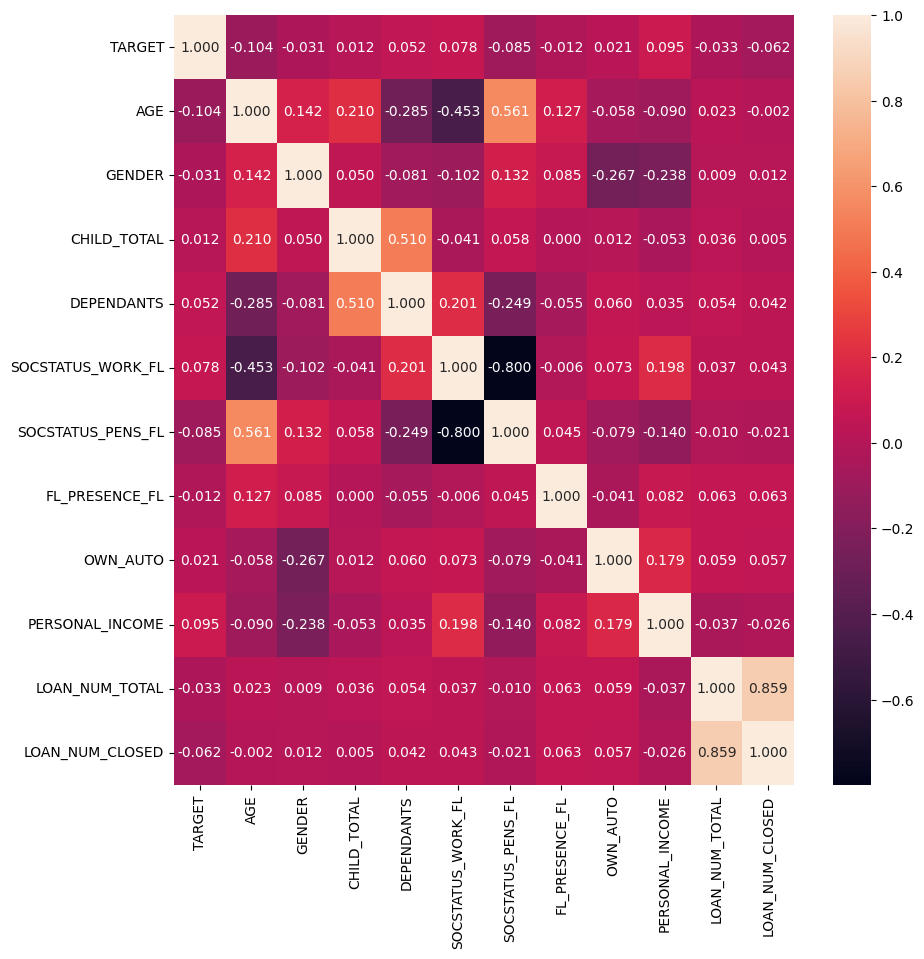

In [18]:
corr = result_table.corr(numeric_only=True)
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.heatmap(corr, annot=True, fmt='.3f', annot_kws={"size":10}, ax=ax)
plt.show()

> Никаких неочевидных зависимостей не наблюдается, поэтому попробуем просто красиво визуализировать некоторые признаки в нашем датасете

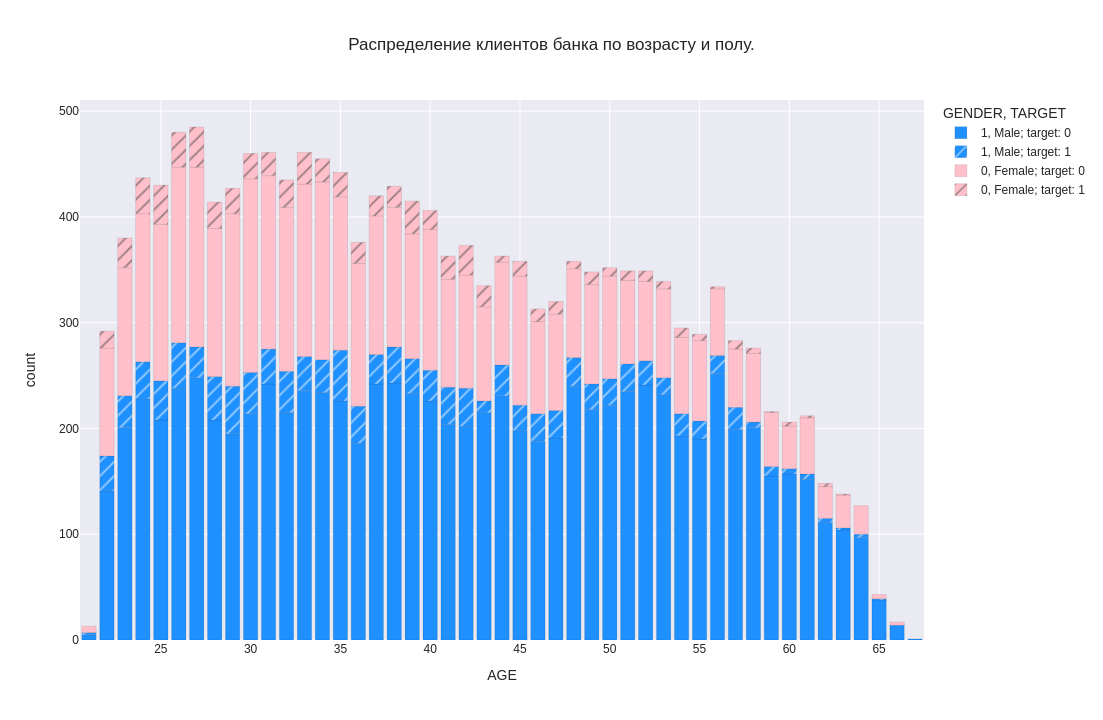

In [19]:
import plotly.offline as py
import plotly.graph_objects as go
import plotly.express as px

# Здесь я экспериментировал с кастомными подписями к столбцам; эксперимент не удался :(
# gender_annot = result_table['GENDER'].map({1: 'Male', 0: 'Female'})

# target_counter = pd.get_dummies(result_table, columns=['TARGET']).groupby('AGE', as_index=False).sum()[['AGE', 'TARGET_0', 'TARGET_1']]
# target_counter = pd.merge(result_table['AGE'], target_counter, how='left', on='AGE')[['TARGET_0', 'TARGET_1']]
# tc_0, tc_1 = target_counter['TARGET_0'], target_counter['TARGET_1'] 

# age_counter = result_table.groupby('AGE', as_index=False).count()[['AGE', 'TARGET']]
# age_counter = pd.merge(result_table['AGE'], age_counter, how='left', on='AGE')['TARGET']

# customdata = np.stack((gender_annot, tc_0, tc_1, age_counter), axis=-1) 

title = 'Распределение клиентов банка по возрасту и полу.'

fig = px.histogram(result_table,
                   x='AGE',
                   color='GENDER',
                   pattern_shape='TARGET',
                   title=title,
                   color_discrete_sequence=['dodgerblue', 'pink'],
                   template='seaborn',
                   width=1080,
                   height=720)

# Здесь продолжение экспериментов с подписями
# hovertemplate = ('GENDER: %{customdata[0]}<br>' + 
#     'AGE: %{x}<br>' + 
#     # 'TARGET 0: %{customdata[1]}<br>' + 
#     # 'TARGET 1: %{customdata[2]}<br>' + 
#     'COUNT: %{customdata[3]}<br>' + 
#     '<extra></extra>')
# fig.update_traces(customdata=customdata, hovertemplate=hovertemplate)

fig.update_layout(bargap=0.2)
fig.update_traces(marker_line_width=0.1,marker_line_color='black')

legend_labels = ['1, Male; target: 0', '1, Male; target: 1', '0, Female; target: 0', '0, Female; target: 1']
for idx, name in enumerate(legend_labels):
    fig.data[idx].name = name

fig.show()

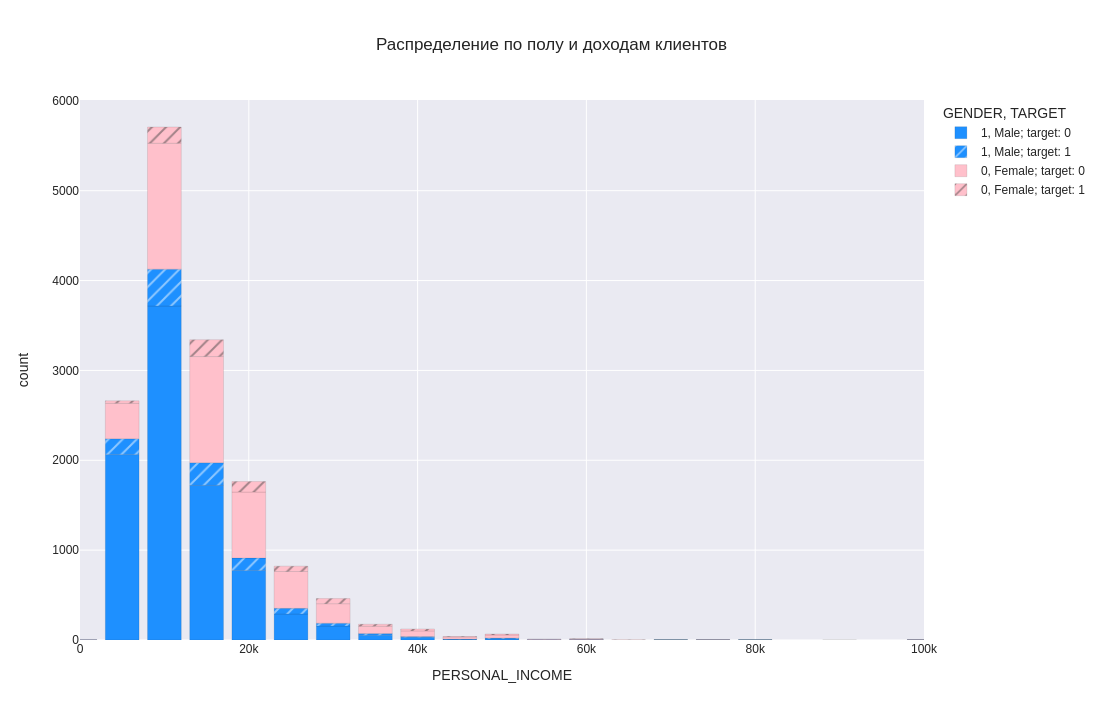

In [20]:
title = 'Распределение по полу и доходам клиентов'

fig = px.histogram(result_table,
                   x='PERSONAL_INCOME',
                   color='GENDER',
                   pattern_shape='TARGET',
                   nbins=120,
                   range_x=[0, 100000],
                   title=title,
                   color_discrete_sequence=['dodgerblue', 'pink'],
                   template='seaborn',
                   width=1080,
                   height=720
                  )

fig.update_layout(bargap=0.2)
fig.update_traces(marker_line_width=0.1,marker_line_color='black')

legend_labels = ['1, Male; target: 0', '1, Male; target: 1', '0, Female; target: 0', '0, Female; target: 1']
for idx, name in enumerate(legend_labels):
    fig.data[idx].name = name

fig.show()

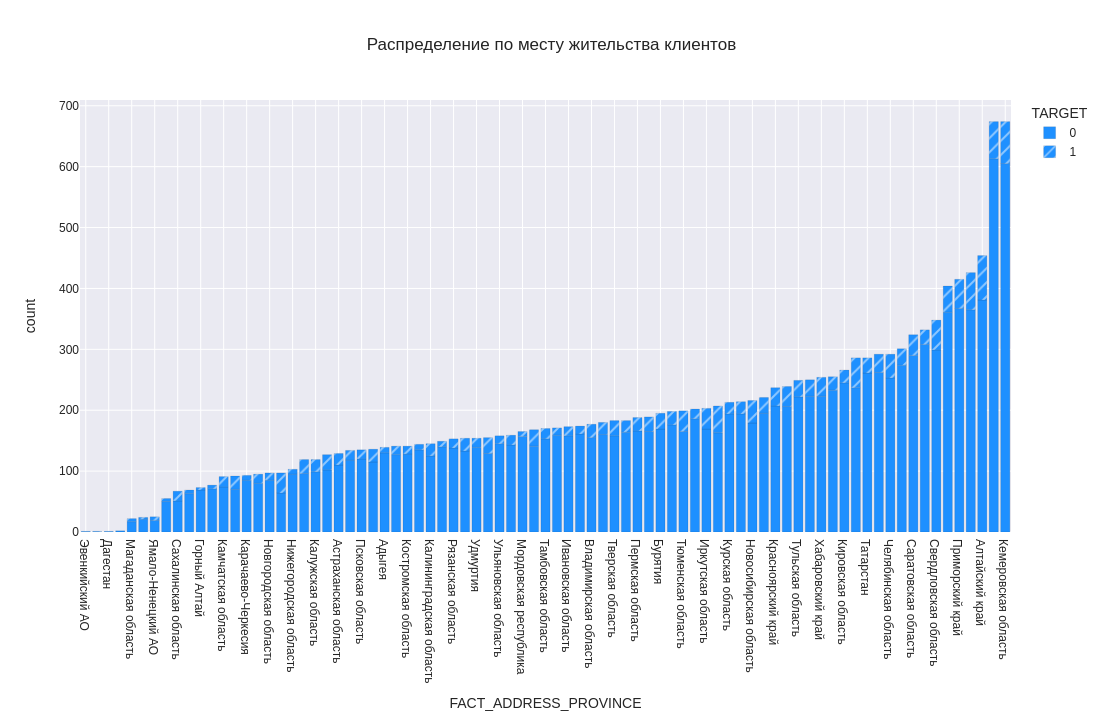

In [21]:
title = 'Распределение по месту жительства клиентов'

fig = px.histogram(result_table,
                   x='FACT_ADDRESS_PROVINCE',
                   # color='GENDER',
                   pattern_shape='TARGET',
                   title=title,
                   color_discrete_sequence=['dodgerblue', 'pink'],
                   template='seaborn',
                   width=1080,
                   height=720
                  )

fig.update_layout(bargap=0.2)
fig.update_traces(marker_line_width=0.1,marker_line_color='black')
fig.update_layout(xaxis={'categoryorder':'total ascending'}) 

fig.show()

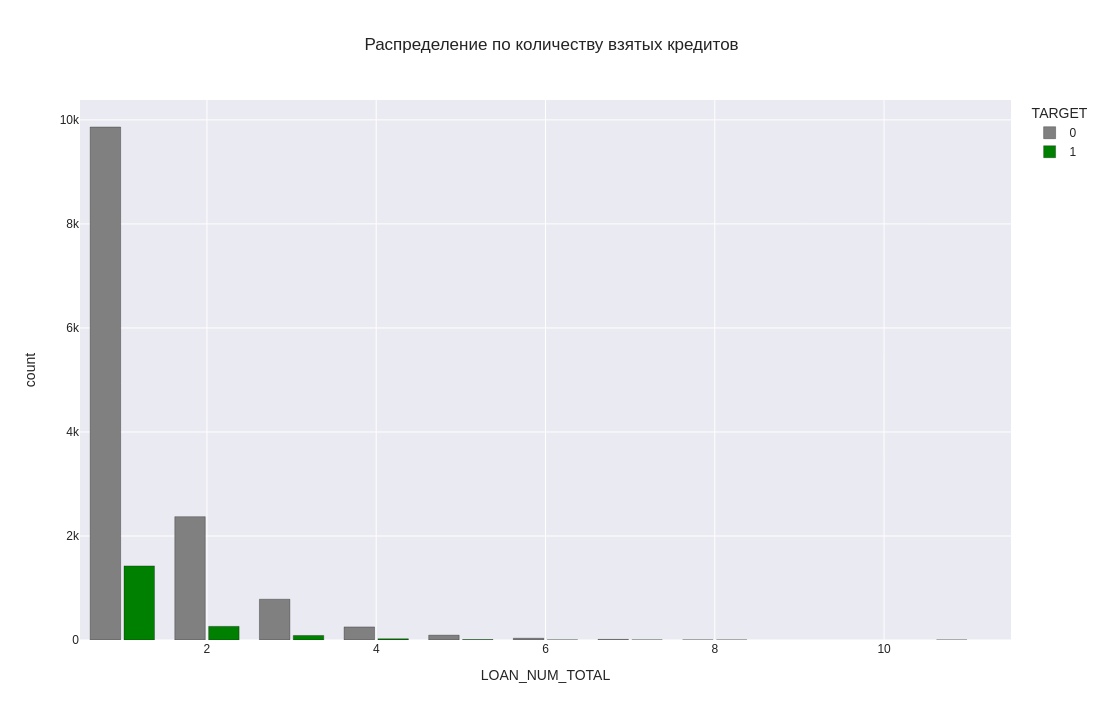

In [22]:
title = 'Распределение по количеству взятых кредитов'

fig = px.histogram(result_table,
                   x='LOAN_NUM_TOTAL',
                   color='TARGET',
                   nbins=int(result_table['LOAN_NUM_TOTAL'].max()),
                   title=title,
                   color_discrete_sequence=['gray', 'green'],
                   template='seaborn',
                   width=1080,
                   height=720
                  )

fig.update_layout(barmode='group')
fig.update_layout(bargap=0.2, bargroupgap=0.1)
fig.update_traces(marker_line_width=0.3,marker_line_color='black')

fig.show()

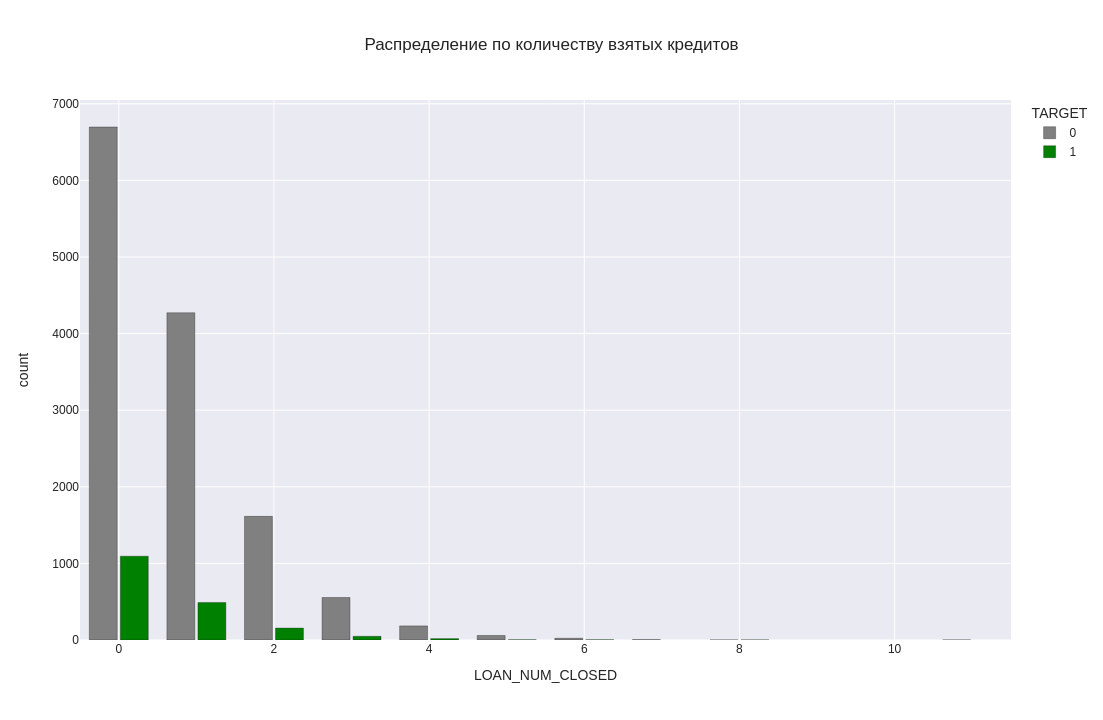

In [23]:
title = 'Распределение по количеству взятых кредитов'

fig = px.histogram(result_table,
                   x='LOAN_NUM_CLOSED',
                   color='TARGET',
                   # nbins=int(result_table['LOAN_NUM_TOTAL'].max()),
                   title=title,
                   color_discrete_sequence=['gray', 'green'],
                   template='seaborn',
                   width=1080,
                   height=720
                  )

fig.update_layout(barmode='group')
fig.update_layout(bargap=0.2, bargroupgap=0.1)
fig.update_traces(marker_line_width=0.3,marker_line_color='black')

fig.show()

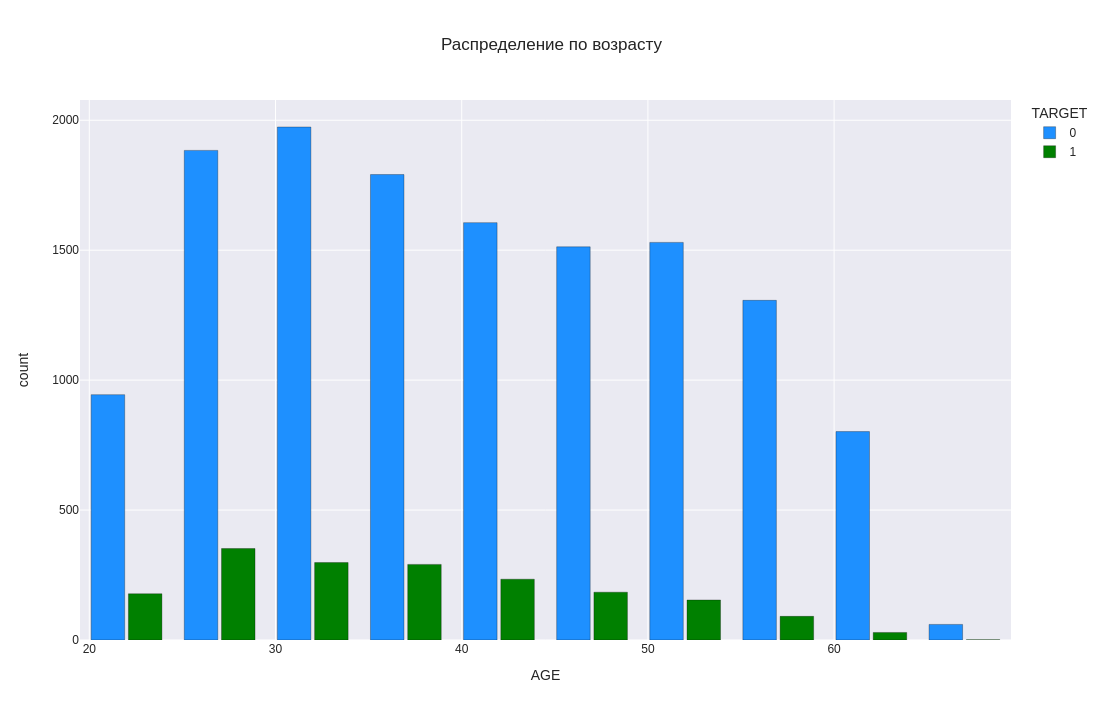

In [24]:
title = 'Распределение по возрасту'

fig = px.histogram(result_table,
                   x='AGE',
                   color='TARGET',
                   nbins=10,
                   title=title,
                   color_discrete_sequence=['dodgerblue', 'green'],
                   template='seaborn',
                   width=1080,
                   height=720
                  )

fig.update_layout(barmode='group')
fig.update_layout(bargap=0.2, bargroupgap=0.1)
fig.update_traces(marker_line_width=0.3,marker_line_color='black')

fig.show()

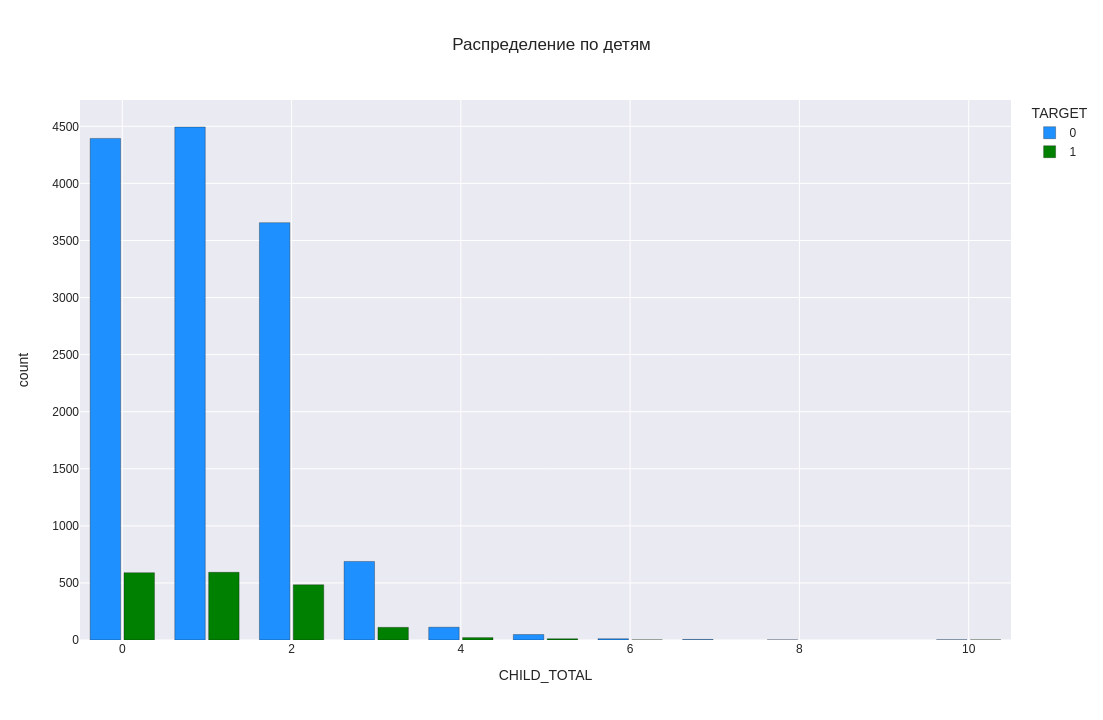

In [25]:
title = 'Распределение по детям'

fig = px.histogram(result_table,
                   x='CHILD_TOTAL',
                   color='TARGET',
                   # nbins=10,
                   title=title,
                   color_discrete_sequence=['dodgerblue', 'green'],
                   template='seaborn',
                   width=1080,
                   height=720
                  )

fig.update_layout(barmode='group')
fig.update_layout(bargap=0.2, bargroupgap=0.1)
fig.update_traces(marker_line_width=0.3,marker_line_color='black')

fig.show()

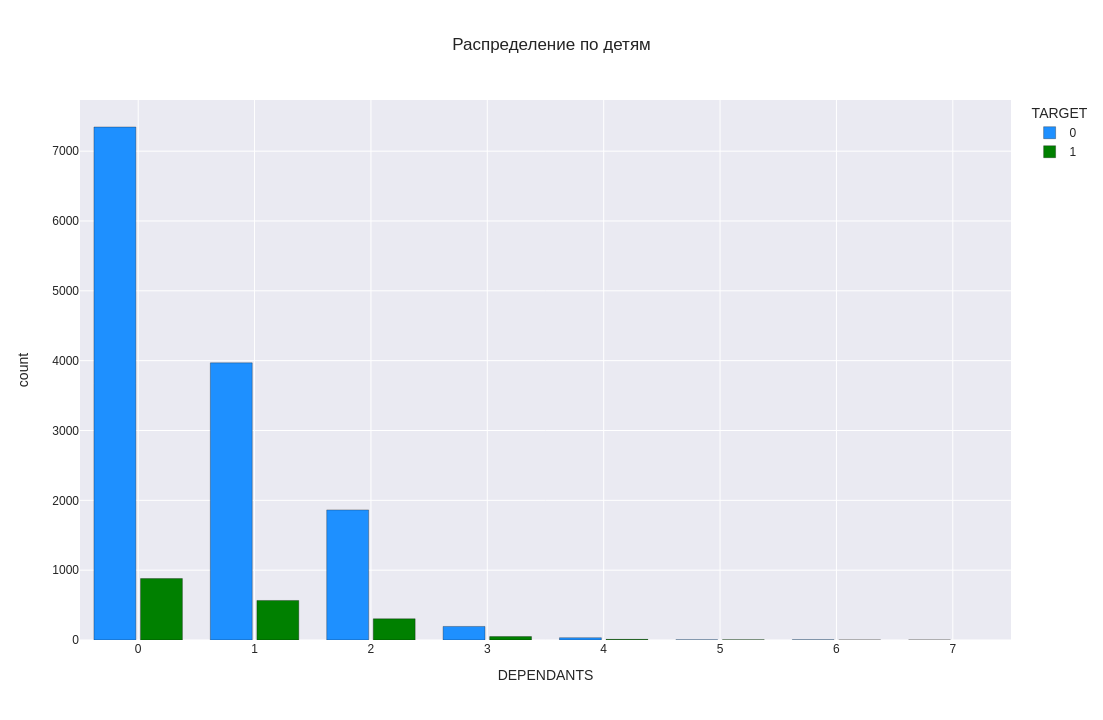

In [26]:
title = 'Распределение по детям'

fig = px.histogram(result_table,
                   x='DEPENDANTS',
                   color='TARGET',
                   # nbins=10,
                   title=title,
                   color_discrete_sequence=['dodgerblue', 'green'],
                   template='seaborn',
                   width=1080,
                   height=720
                  )

fig.update_layout(barmode='group')
fig.update_layout(bargap=0.2, bargroupgap=0.1)
fig.update_traces(marker_line_width=0.3,marker_line_color='black')

fig.show()

## Обучим модель

Попробуем обучить логистическую регрессию, чтобы предсказывать, какой клиент, вероятнее всего, кликнет на рекламное объявление.

Добавим некоторые признаки к нашим данным: разобьем возраст и персональный доход клиента на интервалы в соответствии с ранее построенными графиками, изменим столбец о налиции автомобиля так, чтобы он показывал только факт наличия (а не количество автомобилей), а так же добавим столбец-индикатор, который показывает, есть ли у клиента закрытые кредиты. Кроме этого, удалим некоторые признаки.

In [27]:
X = result_table.drop(columns=['TARGET'])

# Имеет закрытые кредиты?
X['HAS_CLOSED_LOANS'] = (X['LOAN_NUM_CLOSED'] >= 1).astype('int')

# Разбиваем на группы по возрасту.
X['AGE_LT_30'] = (X['AGE'] < 30).astype('int')
X['AGE_BEETWEN_30_50'] = ((X['AGE'] >= 30) & (X['AGE'] < 50)).astype('int')
X['AGE_GE_50'] = (X['AGE'] >= 50).astype('int')

# Разбиваем на группы по персональному доходу
# X['PERSONAL_INCOME_LT_7.5'] = (X['PERSONAL_INCOME'] < 7500).astype('int')
X['PERSONAL_INCOME_BEETWEN_7.5_17.5'] = ((X['PERSONAL_INCOME'] >= 7500) & (X['PERSONAL_INCOME'] < 17500)).astype('int')
X['PERSONAL_INCOME_BEETWEN_7.5_17.5'] = ((X['PERSONAL_INCOME'] >= 7500) & (X['PERSONAL_INCOME'] < 17500)).astype('int')
X['PERSONAL_INCOME_BEETWEN_17.5_27.5'] = ((X['PERSONAL_INCOME'] >= 17500) & (X['PERSONAL_INCOME'] < 27500)).astype('int')
X['PERSONAL_INCOME_GE_27.5'] = (X['PERSONAL_INCOME'] >= 27500).astype('int')
# X['PERSONAL_INCOME'] = np.log(X['PERSONAL_INCOME'])

# Больше 3 детей сожителей?
X['CHILD_LE_3'] = (X['CHILD_TOTAL'] > 3).astype('int')
X['DEPENDANTS_LE_3'] = (X['DEPENDANTS'] > 2).astype('int')

# Имеет ли автомобиль?
X['OWN_AUTO'] = (X['OWN_AUTO'] >=1).astype('int')

# Формируем X и y
X = X.drop(columns=['AGE',
                    'OWN_AUTO',
                    'GENDER',
                    'DEPENDANTS',
                    'CHILD_TOTAL',
                    'FL_PRESENCE_FL',
                    'REG_ADDRESS_PROVINCE',
                    'LOAN_NUM_TOTAL',
                    'LOAN_NUM_CLOSED',
                    'PERSONAL_INCOME'])
y = result_table['TARGET']

Закодируем некоторые признаки One-Hot и Target энкодеров, разобьем на тренировочную и тестовую выборки.

In [28]:
X = pd.get_dummies(X, columns=['SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL'], drop_first=True, dtype='int')

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
from category_encoders import TargetEncoder

t_enc = TargetEncoder(cols=['EDUCATION', 'FACT_ADDRESS_PROVINCE', 'MARITAL_STATUS', 'FAMILY_INCOME']).fit(X_train, y_train)

X_train = t_enc.transform(X_train).reset_index(drop=True)
X_test = t_enc.transform(X_test).reset_index(drop=True)

In [31]:
X_train.head(5)

EDUCATION  MARITAL_STATUS  FACT_ADDRESS_PROVINCE  FAMILY_INCOME  \
0   0.108797        0.127542               0.070051       0.110268   
1   0.112401        0.111617               0.068742       0.110268   
2   0.120875        0.127542               0.070313       0.130530   
3   0.108797        0.111617               0.078704       0.130530   
4   0.108797        0.111617               0.128439       0.130530   

   HAS_CLOSED_LOANS  AGE_LT_30  AGE_BEETWEN_30_50  AGE_GE_50  \
0                 1          0                  1          0   
1                 0          0                  1          0   
2                 1          0                  1          0   
3                 0          0                  1          0   
4                 0          0                  1          0   

   PERSONAL_INCOME_BEETWEN_7.5_17.5  PERSONAL_INCOME_BEETWEN_17.5_27.5  \
0                                 1                                  0   
1                                 0                                  0   
2                                 1                                  0   
3                                 0                                  0   
4                                 0                                  1   

   PERSONAL_INCOME_GE_27.5  CHILD_LE_3  DEPENDANTS_LE_3  SOCSTATUS_WORK_FL_1  \
0                        0           0                0                    1   
1                        0           0                0                    1   
2                        0           0                0                    1   
3                        1           0                0                    1   
4                        0           0                0                    1   

   SOCSTATUS_PENS_FL_1  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

Обучим логистическую регрессию, обязательно указав, что у нас присутствует сильный дисбаланс классов (```class_weight='balanced'```). Положительных классов у нас сильно меньше :(

In [32]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)
test_pred_proba = lr.predict_proba(X_test)

Оценим модель и взглянем на веса.

In [33]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

f1_test = f1_score(y_test, test_pred)
print(f'F1 test score: {f1_test}')

acc_test = accuracy_score(y_test, test_pred)
print(f'Accuracy test: {acc_test}')

F1 test score: 0.2759286058851905
Accuracy test: 0.6056227009984235


In [34]:
print(f'Intercept: {lr.intercept_}')
for label, coef in zip(list(lr.feature_names_in_), list(lr.coef_.ravel())):
    print(f'{label}: {coef}')

Intercept: [-1.86953936]
EDUCATION: 2.25038282285992
MARITAL_STATUS: 1.809287796120951
FACT_ADDRESS_PROVINCE: 6.054766561879707
FAMILY_INCOME: 0.1045648923578711
HAS_CLOSED_LOANS: -0.41246555274124275
AGE_LT_30: 0.27785058833525555
AGE_BEETWEN_30_50: -0.00863104816552283
AGE_GE_50: -0.2877351659324923
PERSONAL_INCOME_BEETWEN_7.5_17.5: 0.32062011298361054
PERSONAL_INCOME_BEETWEN_17.5_27.5: 0.3908620859160942
PERSONAL_INCOME_GE_27.5: 0.9007854574792944
CHILD_LE_3: 0.2686023639008864
DEPENDANTS_LE_3: 0.5205939803973522
SOCSTATUS_WORK_FL_1: 0.5104391072422911
SOCSTATUS_PENS_FL_1: -0.2603954098419916


Построим матрицу ошибок и roc-кривую, подсчитаем roc-auc.

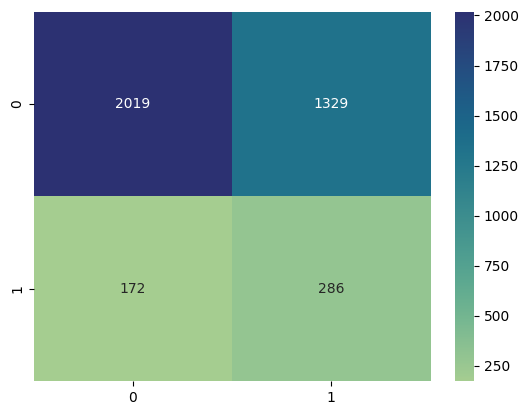

In [35]:
cm = confusion_matrix(y_test, test_pred)
sns.heatmap(cm, annot=True, cmap='crest', fmt='d')
plt.show()

In [36]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(2019, 1329, 172, 286)

In [37]:
thrs = np.arange(0.1, 1.1, 0.1)
thr_preds = []
f1_scores = []
tprs = []
fprs = []

for thr in thrs:
    thr_pred = (test_pred_proba[:, 1] > thr).astype('int64')
    tn, fp, fn, tp = confusion_matrix(y_test, thr_pred).ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    tprs.append(tpr)
    fprs.append(fpr)
    f1_scores.append(f1_score(y_test, thr_pred))
    print(f'{round(thr, 2):.2f}: {f1_score(y_test, thr_pred)}')

0.10: 0.21482176360225141
0.20: 0.22098914354644147
0.30: 0.2301566914975597
0.40: 0.249923053247153
0.50: 0.2759286058851905
0.60: 0.2567947516401124
0.70: 0.12520593080724876
0.80: 0.053169734151329244
0.90: 0.008676789587852495
1.00: 0.0


In [38]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, test_pred)

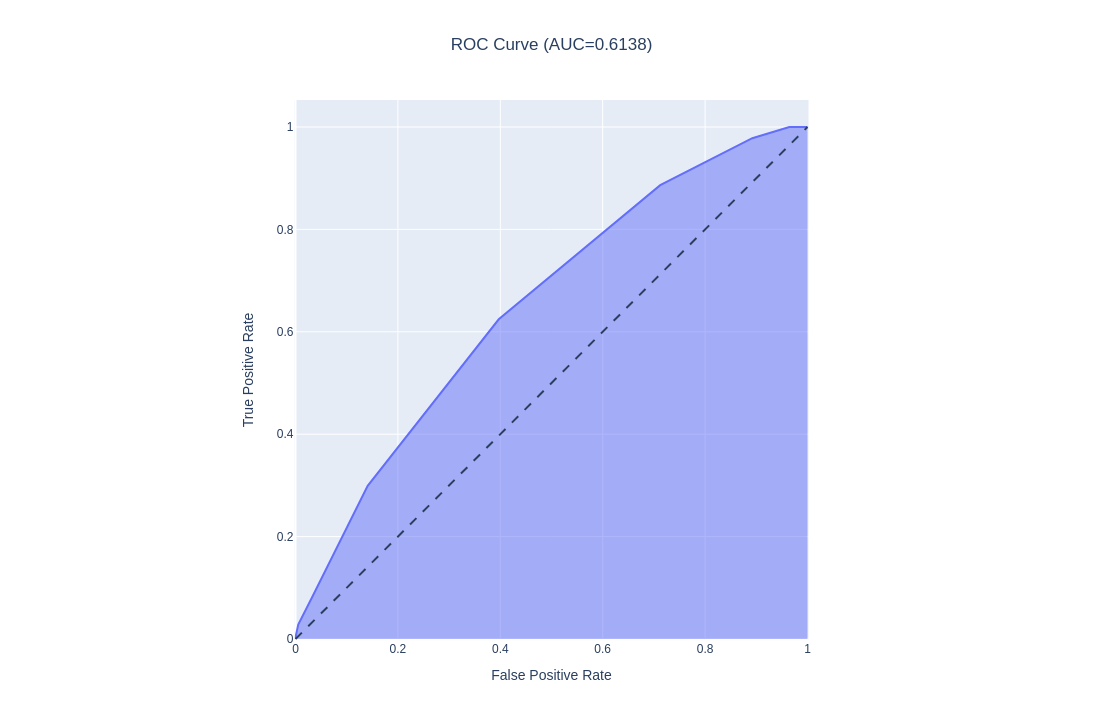

In [39]:
title = 'ROC-AUC'

fig = px.area(
    x=fprs, y=tprs,
    title=f'ROC Curve (AUC={auc:.4f})',
    labels=dict(x='False Positive Rate', y='True Positive Rate'),
    # template='seaborn',
    width=1080, height=720
)
fig.add_shape(
    type='line', line=dict(dash='dash'),
    x0=0, x1=1, y0=0, y1=1
)


fig.update_yaxes(scaleanchor="x", scaleratio=1)
fig.update_xaxes(constrain='domain')
fig.update_layout(title_x=0.5)

fig.show()